In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smapi

In [2]:
df = pd.read_csv('House-Price.csv')
df.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [3]:
df.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [4]:
df.duplicated().sum()

2031

In [5]:
df.shape

(21613, 2)

In [6]:
df.drop_duplicates(inplace = True)

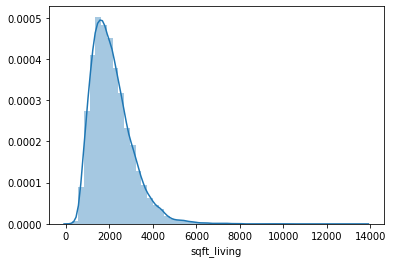

In [7]:
sns.distplot(df['sqft_living'])

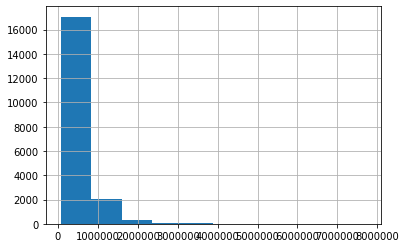

In [8]:
df['price'].hist() 

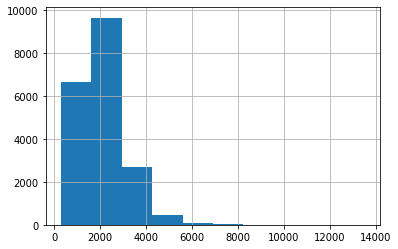

In [9]:
df['sqft_living'].hist() 

(array([9.000e+00, 6.200e+01, 8.510e+02, 3.128e+03, 6.064e+03, 6.130e+03,
        2.806e+03, 4.790e+02, 4.800e+01, 5.000e+00]),
 array([5.66988092, 6.05423319, 6.43858545, 6.82293771, 7.20728997,
        7.59164223, 7.9759945 , 8.36034676, 8.74469902, 9.12905128,
        9.51340355]),
 <a list of 10 Patch objects>)

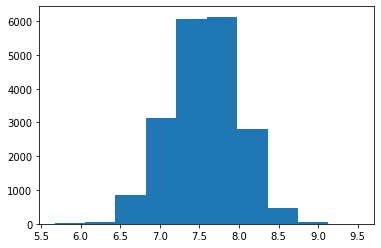

In [10]:
plt.hist(np.log(df['sqft_living']))

In [11]:
df['sqft_living']=np.log(df['sqft_living'])

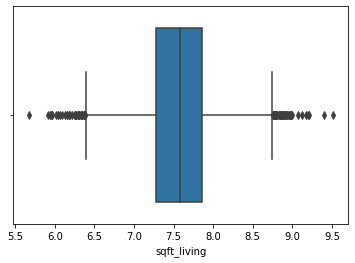

In [12]:
sns.boxplot(df['sqft_living'])

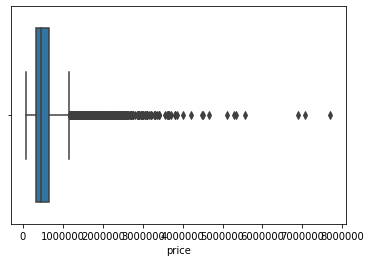

In [13]:
sns.boxplot(df['price'])

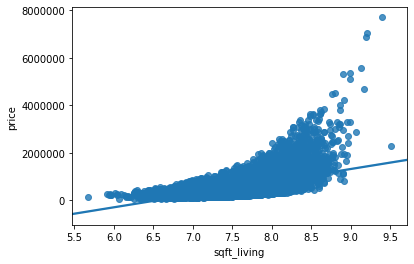

In [14]:
sns.regplot(x='sqft_living',y='price',data=df)

In [15]:
corr =df.corr()
corr

,price,sqft_living
price,1.000000,0.610154
sqft_living,0.610154,1.000000


In [16]:
corr.style.background_gradient(cmap='coolwarm')

,price,sqft_living
price,1,0.610154
sqft_living,0.610154,1


if i remove all the outlier then check r2

In [17]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [18]:
UL

price          1.160000e+06
sqft_living    8.749569e+00
dtype: float64

In [19]:
LL

price         -176000.000000
sqft_living         6.386096
dtype: float64

In [20]:
a=df[(df['sqft_living']>8.749569e+00)|(df['sqft_living']<6.386096)]

In [21]:
df.drop(a.index,inplace=True)

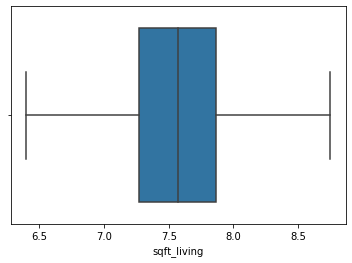

In [22]:
sns.boxplot(df['sqft_living'])

In [23]:
lm =smapi.ols(formula='price~sqft_living',data=df).fit()

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:35:14   Log-Likelihood:            -2.7172e+05
No. Observations:               19481   AIC:                         5.434e+05
Df Residuals:                   19479   BIC:                         5.435e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.303e+06   3.56e+04    -92.866      0.000   -3.37e+06   -3.23e+06
sqft_living  5.089e+05   4696.173    108.373      0.000       5e+05    5.18e+05
==============================================================================
Omnibus:                    11537.250   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177989.418
Skew:                           2.562   Prob(JB):                         0.00
Kurtosis:                      16.893   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y=df[['price']]
x=df[['sqft_living']]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

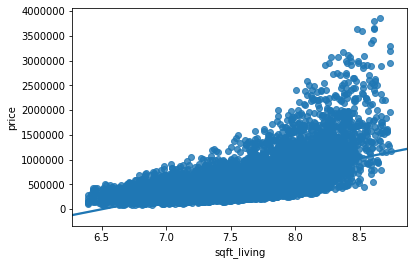

In [29]:
sns.regplot(x_train['sqft_living'],y_train['price'])

In [30]:
model.intercept_

array([-3344984.00194233])

In [31]:
model.coef_

array([[514363.6260989]])

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([[795019.92527866],
       [314594.61037711],
       [798296.13779502],
       ...,
       [395673.20569581],
       [572301.90948164],
       [521755.28204793]])

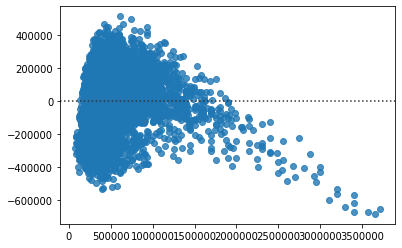

In [34]:
sns.residplot(y_test, y_pred)


In [35]:
from sklearn import metrics

In [36]:
r_sq = metrics.r2_score(y_test,y_pred)

In [37]:
r_sq

0.3655578335024007

In [38]:
mse =metrics.mean_squared_error(y_test,y_pred)

In [39]:
np.sqrt(mse)

278267.279942447

In [40]:
df_error = pd.DataFrame(y_pred-y_test)
df_error.sort_index(inplace=True)
df_error

,price
8,275202.992479
9,212546.017651
12,82088.775677
16,140546.017651
18,112893.628627
...,...
21588,-108337.769065
21602,192670.554822
21604,-15770.017378
21605,72834.211600


In [41]:
np.mean(df_error)

price   -2382.270646
dtype: float64

In [42]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=8)
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)
y_pred
from sklearn.metrics import r2_score
from math import sqrt
mae=metrics.mean_absolute_error(y_test, y_pred)  
mse=metrics.mean_squared_error(y_test, y_pred)  
rmse=sqrt(mse)
print('Mean Absolute Error:', mae) 
print('Mean Squared Error:', mse) 
print("R sqaured value: ",rmse)
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)
r_squared

Mean Absolute Error: 175654.87078111593
Mean Squared Error: 70131971694.83229
R sqaured value:  264824.41672706895


0.45206511545052375

conclusion:- worst model i have made in my life

second method

In [43]:
df = pd.read_csv('House-Price.csv')
df.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [44]:
lm = smapi.ols(formula='price~sqft_living',data=df).fit()

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:35:23   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.387e+04   4405.455     -9.958      0.000   -5.25e+04   -3.52e+04
sqft_living   280.8067      1.938    144.924      0.000     277.009     284.605
==============================================================================
Omnibus:                    14815.593   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543533.863
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
x1=df[['sqft_living']]
y1=df[['price']]
x_train,x_test,y_train,y_test = train_test_split(x1,y1,train_size=0.7,random_state=0)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse =metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse)

265047.29435622034

In [47]:
residual = pd.DataFrame(y_pred-y_test)
residual.sort_index(inplace=True)
residual

,price
1,139592.868739
7,-34805.629221
8,228070.806892
12,50092.678226
16,93206.790187
...,...
21602,155588.303959
21605,52982.421787
21609,205180.544587
21610,-156196.986783


# Normailty of Residual


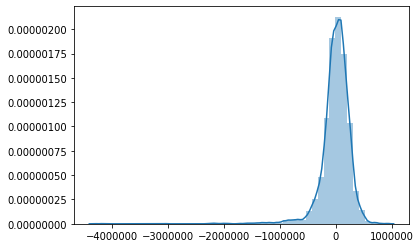

In [48]:
sns.distplot(residual)

In [49]:
np.mean(residual)

price    3044.637936
dtype: float64

In [50]:
import scipy
from scipy import stats

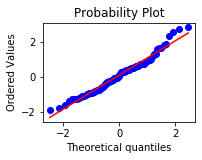

In [51]:
ax = plt.subplot(222)
residual = stats.t.rvs(25, size=100)
res = stats.probplot(residual, plot=plt)

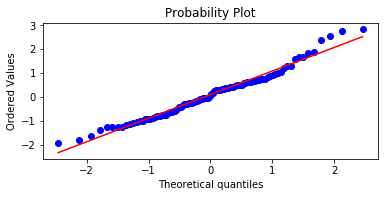

In [52]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)

In [53]:
np.mean(residual)

0.09527783605933485

In [54]:
from scipy.stats import normaltest
normaltest(residual)

NormaltestResult(statistic=4.6180305486500455, pvalue=0.09935904480444391)

The null hypothesis is that the residual distribution is Normally distributed. 
Since the p-value > 0.05, we cannot reject the null. 
In other words, we can confidently say the residuals are Normally distributed.

# Homoscedasticity

# Autocorrelation

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


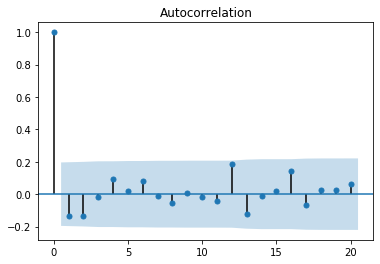

In [55]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, alpha=0.05)
acf.show()

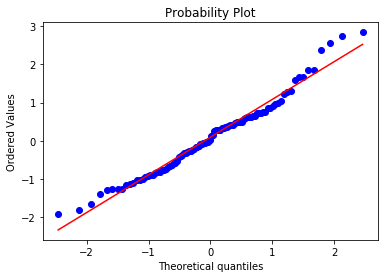

In [56]:
import scipy.stats as stats
stats.probplot(residual, dist="norm", plot=plt)
plt.show()